In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')
df.info()

print('Датафрейм содержит {} столбцов с пропущенными значениями'.format(df.isnull().any().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Предобработка

In [2]:
# Переименуем столбцы
df.columns = ['school_name', 'sex', 'age', 'urban_living', 'big_family', 'parents_together', 'mother_education', \
              'father_education', 'mother_job', 'father_job', 'school_choise_reason', 'guardian', 'school_travel_time', \
              'extra_study_time', 'failures', 'extra_edu_support', 'family_edu_support', 'paid_extra_math', \
              'extra_activities', 'kindergarten', 'studytime_granular', 'wants_high_edu', 'internet', 'romantic', \
              'fam_rel_points', 'free_time_points', 'go_out_points', 'health_points', 'lessons_skipped', 'exam_score']

# Введем нормальные обозначения
df.urban_living = df.urban_living.apply(lambda x: 'yes' if x=='U' else 'no' if x=='R' else x)
df.big_family = df.big_family.apply(lambda x: 'yes' if x=='GT3' else 'no' if x=='LE3' else x)
df.parents_together = df.parents_together.apply(lambda x: 'yes' if x=='T' else 'no' if x=='A' else x)

In [3]:
def column_info(column):
    '''Функция принимает на вход колонку датафрейма и выводит общую информацию о нем'''
    display(pd.DataFrame(column))
    print('Пустых значений с столбце:{} ({}%)'.format(column.isnull().sum(), round(column.isnull().sum()*100/len(df), 1)))
    print('Уникальных значений с столбце:', column.nunique(), '\n')
    print(column.value_counts(), '\n')  
    

def box_dist_plot(df, column):
    '''
    Функция принимает на вход номинативную колонку и строит boxplot для каждого уникального значения из столбца.
    Boxplot отражает количество баллов за экзамен.
    
    Далее для всех уникальных значений из столбца строится график функции распределения баллов за экзамен.
    '''
    fig, ax = plt.subplots(figsize = (14,6))
    sns.boxplot(x=column, y='exam_score', data=df)
    ax.set_title('Boxplot для ' + column)
    plt.show()
    
    plt.figure()
    for col_index in df[column].value_counts().index:
        sns.distplot(df.loc[df[column]==col_index, 'exam_score'], label=col_index)
    plt.legend()
    plt.show()
    
    
def get_stat_dif(df, column, stat_diff_list):
    '''
    Проведение теста Стьюдента для уникальных значений из номинативных колонок. 
    Целевой параметр -- полученный балл за экзамен exam_score  
    '''
    cols = df.loc[:,column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'exam_score'], 
                        df.loc[df.loc[:, column] == comb[1], 'exam_score']).pvalue \
            <= 0.05/len(combinations_all): # Поправка Бонферони
            print('Найдены статистически значимые различия для колонки ', column)
            stat_diff_list.append(column)
            break  

# exam_score

,exam_score
0,30.0
1,30.0
2,50.0
3,75.0
4,50.0
...,...
390,45.0
391,80.0
392,35.0
393,50.0


Пустых значений с столбце:6 (1.5%)
Уникальных значений с столбце: 18 

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: exam_score, dtype: int64 



C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exam_score', ylabel='Density'>

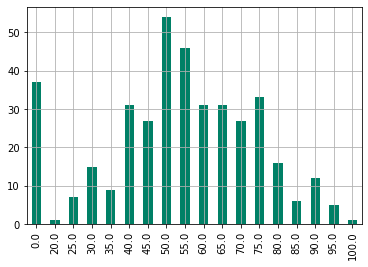

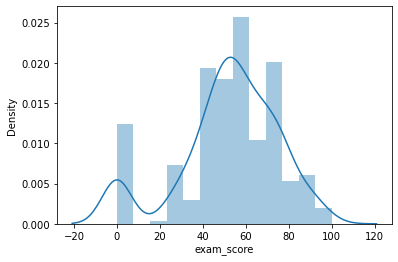

In [4]:
column_info(df.exam_score)
df.exam_score.value_counts().sort_index().plot(kind='bar',
                                                  grid=True,
                                                  colormap='summer')
plt.figure()
sns.distplot(df.exam_score)

In [5]:
# Если посмотреть на график плотности распределения exam_score, то можно увидеть, что есть достаточно много 
# учеников с 0 баллов за экзамен. Это кажется очень странным, давайте посмотрим повнимательнее на этих учеников
# Таких 37 человек
#
display(df[df.exam_score==0])
len(df[df.exam_score==0])

,school_name,sex,age,urban_living,big_family,parents_together,mother_education,father_education,mother_job,father_job,school_choise_reason,guardian,school_travel_time,extra_study_time,failures,extra_edu_support,family_edu_support,paid_extra_math,extra_activities,kindergarten,studytime_granular,wants_high_edu,internet,romantic,fam_rel_points,free_time_points,go_out_points,health_points,lessons_skipped,exam_score
128,GP,M,18,no,NaN,yes,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,no,yes,yes,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,yes,yes,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,no,yes,yes,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,yes,yes,yes,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,no,yes,yes,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,yes,yes,no,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,yes,yes,yes,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,yes,yes,yes,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,yes,yes,yes,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


37

,exam_score
0,30.0
1,30.0
2,50.0
3,75.0
4,50.0
...,...
390,45.0
391,80.0
392,35.0
393,50.0


Пустых значений с столбце:6 (1.7%)
Уникальных значений с столбце: 17 

50.0     54
55.0     46
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: exam_score, dtype: int64 



C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exam_score', ylabel='Density'>

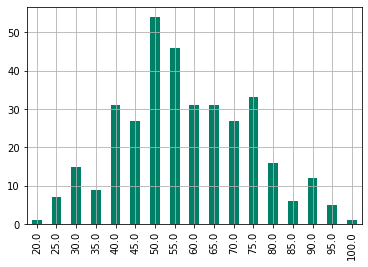

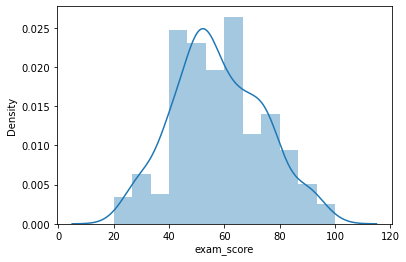

In [6]:
# Далее замечаем одну очень странную особенность: якобы ноль баллов получили ученики, которые не пропускали занятия.
# То есть у которых lessons_skipped == 0. Это очень странно. Вероятно, произошла ошибка либо в столбце
# lessons_skipped, либо в столбце exam_score. Так или иначе, этот фрагмент данных я считаю нужным удалить
#
df = df[df.exam_score!=0] 

column_info(df.exam_score)
df.exam_score.value_counts().sort_index().plot(kind='bar', 
                                                  grid=True,
                                                  colormap='summer')
plt.figure()
sns.distplot(df.exam_score)

# lessons_skipped

,lessons_skipped
0,6.0
1,4.0
2,10.0
3,2.0
4,4.0
...,...
390,212.0
391,3.0
392,3.0
393,0.0


Пустых значений с столбце:11 (3.1%)
Уникальных значений с столбце: 36 

0.0      75
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: lessons_skipped, dtype: int64 



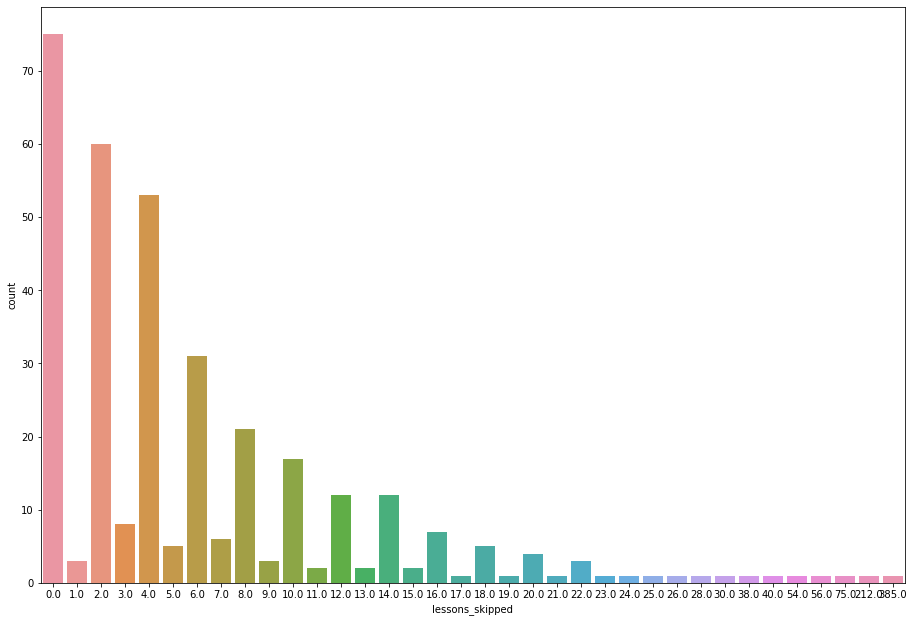

In [7]:
column_info(df.lessons_skipped)

fig = plt.figure()
fig.add_axes([0,0,2,2])
sns.countplot(x='lessons_skipped', data=df, order=df.lessons_skipped.value_counts().sort_index().index)

27


,lessons_skipped
0,6.0
1,4.0
2,10.0
3,2.0
4,4.0
...,...
388,0.0
391,3.0
392,3.0
393,0.0


Пустых значений с столбце:11 (3.3%)
Уникальных значений с столбце: 18 

0.0     75
2.0     60
4.0     53
6.0     31
8.0     21
10.0    17
12.0    12
14.0    12
3.0      8
16.0     7
7.0      6
5.0      5
1.0      3
9.0      3
15.0     2
13.0     2
11.0     2
17.0     1
Name: lessons_skipped, dtype: int64 



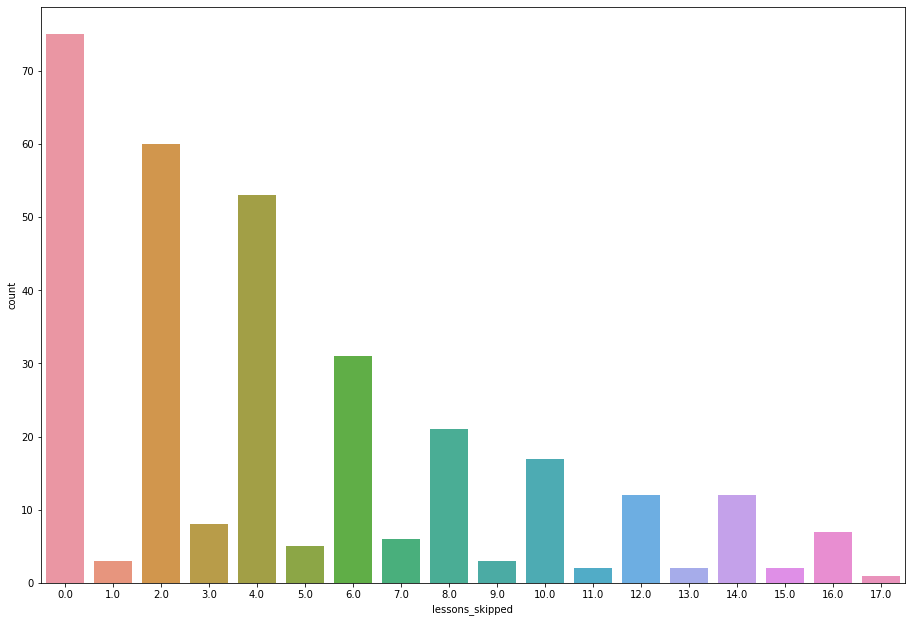

In [8]:
# Виден достаточно большой разброс значений. Уберем самые большие значения числа пропущенных уроков, т.к. 
# в школу все же ходят учиться, а не пропускать уроки :) Вдобавок, без ML понятно, если прогуливать много занятий,
# то результат на экзамене будет плохой
perc25 = df.lessons_skipped.quantile(0.25)
perc75 = df.lessons_skipped.quantile(0.75)
IQR = perc75 - perc25

# Для модели сохраним значения, которые находятся в диапазоне от 0 до perc75 + 1.5*IQR
# И не будем удалять пропуски
print(len(df[df.lessons_skipped > perc75 + 1.5*IQR]))
df = df[(df.lessons_skipped <= perc75 + 1.5*IQR) | (df.lessons_skipped.isnull())]

fig = plt.figure()
fig.add_axes([0,0,2,2])
sns.countplot(x='lessons_skipped', data=df, order=df.lessons_skipped.value_counts().sort_index().index)

column_info(df.lessons_skipped)

# school_name

In [9]:
column_info(df.school_name)
print('{} % учеников из школы GP'.format(round(df.school_name.value_counts().loc['GP']*100/len(df), 1)))

,school_name
0,GP
1,GP
2,GP
3,GP
4,GP
...,...
388,MS
391,MS
392,MS
393,MS


Пустых значений с столбце:0 (0.0%)
Уникальных значений с столбце: 2 

GP    290
MS     41
Name: school_name, dtype: int64 

87.6 % учеников из школы GP


In [10]:
# В датасете представлены ученики двух школ
# Большинмтво из них учатся в школе GP
# Пропусков нет

# sex

In [11]:
column_info(df.sex)

,sex
0,F
1,F
2,F
3,F
4,F
...,...
388,F
391,M
392,M
393,M


Пустых значений с столбце:0 (0.0%)
Уникальных значений с столбце: 2 

F    169
M    162
Name: sex, dtype: int64 



In [12]:
# Число девочек немного больше числа мальчиков
# Хорошо, что полов только 2... Ради шутки надо добавить пол attack_helicopter :)
# Пропусков нет

# age

,age
0,18
1,17
2,15
3,15
4,16
...,...
388,18
391,17
392,21
393,18


Пустых значений с столбце:0 (0.0%)
Уникальных значений с столбце: 8 

16    90
17    81
15    75
18    68
19    13
20     2
22     1
21     1
Name: age, dtype: int64 



<AxesSubplot:>

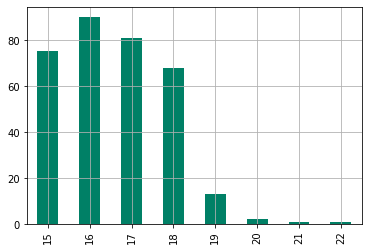

In [13]:
column_info(df.age)
df.age.value_counts().sort_index().plot(kind='bar',
                                       grid=True,
                                       colormap='summer')

In [14]:
# Большинеству учеников 15-18 лет 
# Выбросов тоже нет, потому что исследуется успеваемость в возрасте от 15 до 22 лет
# Пропусков нет
# Будущая модель будет хорошо предсказывать результаты экзамена для лиц от 15 до 18 лет, потому что таких большинство

# urban_living

In [15]:
column_info(df.urban_living)
print('{} % учеников живут в городе'.format(round(df.urban_living.value_counts().loc['yes']*100/len(df), 1)))

,urban_living
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
388,yes
391,yes
392,no
393,no


Пустых значений с столбце:16 (4.8%)
Уникальных значений с столбце: 2 

yes    246
no      69
Name: urban_living, dtype: int64 

74.3 % учеников живут в городе


In [16]:
# Примерно 3/4 учеников живет в городе 

# big_family

In [17]:
column_info(df.big_family)
print('{} % учеников живут в многодетной семье'.format(round(df.big_family.value_counts().loc['yes']*100/len(df), 1)))

,big_family
0,NaN
1,yes
2,no
3,yes
4,yes
...,...
388,no
391,no
392,yes
393,no


Пустых значений с столбце:21 (6.3%)
Уникальных значений с столбце: 2 

yes    217
no      93
Name: big_family, dtype: int64 

65.6 % учеников живут в многодетной семье


In [18]:
# Больше половины опрошеных живут в многодетной семье

# parents_together

In [19]:
column_info(df.parents_together)
print('{} % учеников живут с обоими родителями'.format(round(df.parents_together.value_counts().loc['yes']*100/len(df), 1)))

,parents_together
0,no
1,NaN
2,yes
3,yes
4,yes
...,...
388,yes
391,yes
392,yes
393,yes


Пустых значений с столбце:35 (10.6%)
Уникальных значений с столбце: 2 

yes    268
no      28
Name: parents_together, dtype: int64 

81.0 % учеников живут с обоими родителями


# mother_education образование (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,mother_education
0,4.0
1,1.0
2,1.0
3,4.0
4,3.0
...,...
388,3.0
391,3.0
392,1.0
393,3.0


Пустых значений с столбце:2 (0.6%)
Уникальных значений с столбце: 5 

4.0    116
2.0     83
3.0     80
1.0     47
0.0      3
Name: mother_education, dtype: int64 



<AxesSubplot:>

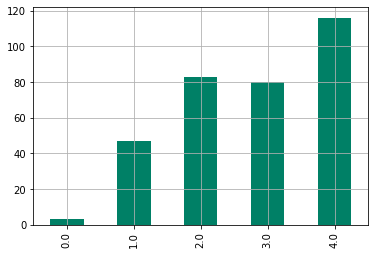

In [20]:
column_info(df.mother_education)
df.mother_education.value_counts().sort_index().plot(kind = 'bar', 
                                                    grid = True, 
                                                    colormap = 'summer')

# father_education образование (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

,father_education
0,4.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
388,1.0
391,1.0
392,1.0
393,2.0


Пустых значений с столбце:20 (6.0%)
Уникальных значений с столбце: 5 

2.0    89
3.0    82
4.0    74
1.0    64
0.0     2
Name: father_education, dtype: int64 



<AxesSubplot:>

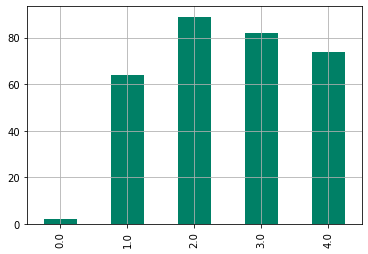

In [21]:
df.father_education = df.father_education.apply(lambda x: None if (x!=None) and (x>5) else x) #устранили выброс
column_info(df.father_education)
df.father_education.value_counts().sort_index().plot(kind='bar',
                                                    grid=True,
                                                    colormap = 'summer')

# mother_job 

,mother_job
0,at_home
1,at_home
2,at_home
3,health
4,other
...,...
388,teacher
391,services
392,other
393,services


Пустых значений с столбце:15 (4.5%)
Уникальных значений с столбце: 5 

other       110
services     83
teacher      48
at_home      46
health       29
Name: mother_job, dtype: int64 



<AxesSubplot:>

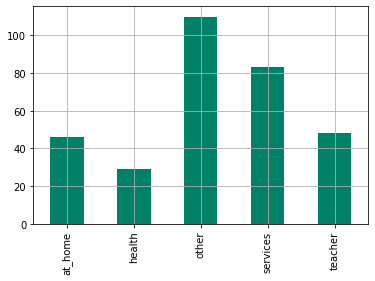

In [22]:
column_info(df.mother_job)
df.mother_job.value_counts().sort_index().plot(kind='bar',
                                              grid=True,
                                              colormap='summer')

# father_job

,father_job
0,teacher
1,other
2,other
3,NaN
4,other
...,...
388,services
391,services
392,other
393,other


Пустых значений с столбце:29 (8.8%)
Уникальных значений с столбце: 5 

other       166
services     84
teacher      24
health       14
at_home      14
Name: father_job, dtype: int64 



<AxesSubplot:>

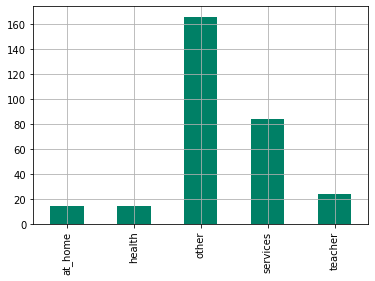

In [23]:
column_info(df.father_job)
df.father_job.value_counts().sort_index().plot(kind='bar',
                                              grid=True,
                                              colormap='summer')

# school_choise_reason причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

,school_choise_reason
0,course
1,course
2,other
3,home
4,home
...,...
388,course
391,course
392,course
393,course


Пустых значений с столбце:15 (4.5%)
Уникальных значений с столбце: 4 

course        117
reputation     89
home           79
other          31
Name: school_choise_reason, dtype: int64 



<AxesSubplot:>

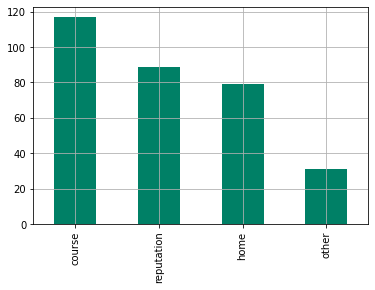

In [24]:
column_info(df.school_choise_reason)
df.school_choise_reason.value_counts().plot(kind='bar', grid=True, colormap='summer')

# guardian

,guardian
0,mother
1,father
2,mother
3,mother
4,father
...,...
388,mother
391,mother
392,NaN
393,mother


Пустых значений с столбце:28 (8.5%)
Уникальных значений с столбце: 3 

mother    209
father     76
other      18
Name: guardian, dtype: int64 



<AxesSubplot:>

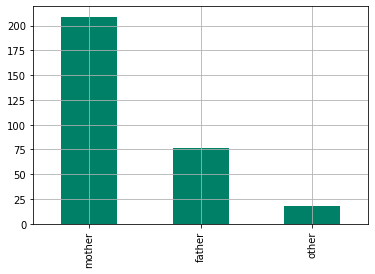

In [25]:
column_info(df.guardian)
df.guardian.value_counts().plot(kind='bar', grid=True, colormap='summer')

# school_travel_time время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

,school_travel_time
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
388,1.0
391,2.0
392,1.0
393,3.0


Пустых значений с столбце:22 (6.6%)
Уникальных значений с столбце: 4 

1.0    206
2.0     80
3.0     16
4.0      7
Name: school_travel_time, dtype: int64 



<AxesSubplot:xlabel='school_travel_time', ylabel='count'>

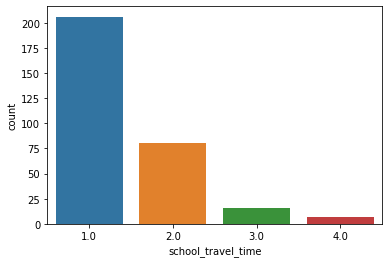

In [26]:
column_info(df.school_travel_time)
plt.figure()
sns.countplot(x='school_travel_time', data=df, order=df.school_travel_time.value_counts().sort_index(ascending=True).index)

# extra_study_time время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

,extra_study_time
0,2.0
1,2.0
2,2.0
3,3.0
4,2.0
...,...
388,2.0
391,1.0
392,1.0
393,1.0


Пустых значений с столбце:7 (2.1%)
Уникальных значений с столбце: 4 

2.0    161
1.0     82
3.0     57
4.0     24
Name: extra_study_time, dtype: int64 



<AxesSubplot:xlabel='extra_study_time', ylabel='count'>

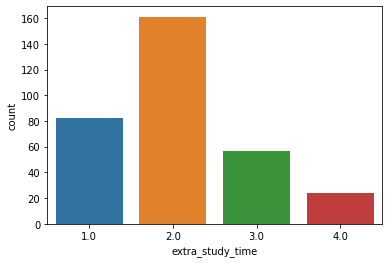

In [27]:
column_info(df.extra_study_time)
plt.figure()
sns.countplot(x='extra_study_time', data=df, order=df.extra_study_time.value_counts().sort_index(ascending=True).index)

# failures количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

,failures
0,0.0
1,0.0
2,3.0
3,0.0
4,0.0
...,...
388,0.0
391,0.0
392,3.0
393,0.0


Пустых значений с столбце:17 (5.1%)
Уникальных значений с столбце: 4 

0.0    263
1.0     30
3.0     11
2.0     10
Name: failures, dtype: int64 



<AxesSubplot:xlabel='failures', ylabel='count'>

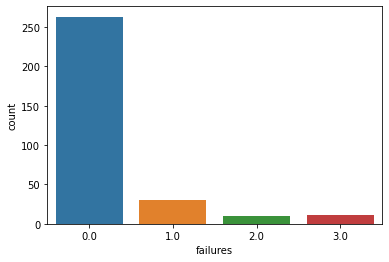

In [28]:
column_info(df.failures)
plt.figure()
sns.countplot(x='failures', data=df, order=df.failures.value_counts().sort_index(ascending=True).index)

# extra_edu_support дополнительная образовательная поддержка (yes или no)

,extra_edu_support
0,yes
1,no
2,yes
3,no
4,no
...,...
388,no
391,no
392,NaN
393,no


Пустых значений с столбце:9 (2.7%)
Уникальных значений с столбце: 2 

no     276
yes     46
Name: extra_edu_support, dtype: int64 



<AxesSubplot:xlabel='extra_edu_support', ylabel='count'>

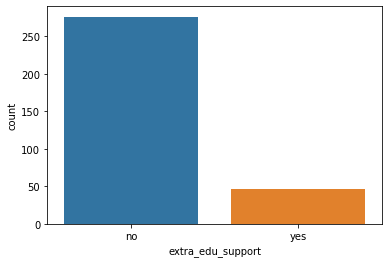

In [29]:
column_info(df.extra_edu_support)
plt.figure()
sns.countplot(x='extra_edu_support', data=df, order=df.extra_edu_support.value_counts().sort_index(ascending=True).index)

# family_edu_support семейная образовательная поддержка (yes или no)

,family_edu_support
0,no
1,yes
2,no
3,yes
4,yes
...,...
388,yes
391,no
392,no
393,no


Пустых значений с столбце:31 (9.4%)
Уникальных значений с столбце: 2 

yes    183
no     117
Name: family_edu_support, dtype: int64 



<AxesSubplot:xlabel='family_edu_support', ylabel='count'>

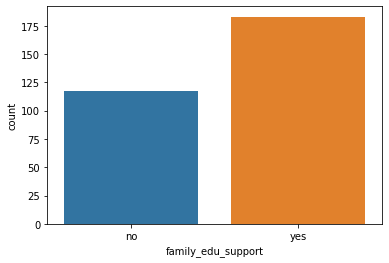

In [30]:
column_info(df.family_edu_support)
sns.countplot(x='family_edu_support', data=df)

# paid_extra_math

,paid_extra_math
0,no
1,no
2,NaN
3,yes
4,yes
...,...
388,yes
391,no
392,no
393,no


Пустых значений с столбце:35 (10.6%)
Уникальных значений с столбце: 2 

no     159
yes    137
Name: paid_extra_math, dtype: int64 



<AxesSubplot:xlabel='paid_extra_math', ylabel='count'>

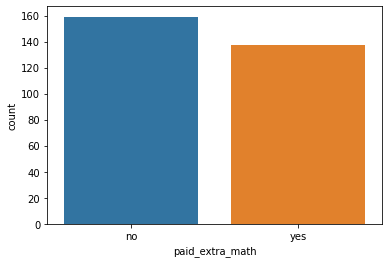

In [31]:
column_info(df.paid_extra_math)
sns.countplot(x='paid_extra_math', data=df)

# extra_activities

,extra_activities
0,no
1,no
2,no
3,yes
4,no
...,...
388,no
391,no
392,no
393,NaN


Пустых значений с столбце:12 (3.6%)
Уникальных значений с столбце: 2 

yes    166
no     153
Name: extra_activities, dtype: int64 



<AxesSubplot:xlabel='extra_activities', ylabel='count'>

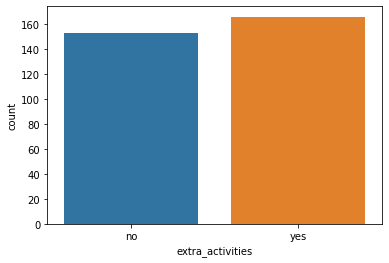

In [32]:
column_info(df.extra_activities)
sns.countplot(x='extra_activities', data=df)

# kindergarten

,kindergarten
0,yes
1,no
2,yes
3,yes
4,yes
...,...
388,yes
391,no
392,no
393,no


Пустых значений с столбце:13 (3.9%)
Уникальных значений с столбце: 2 

yes    252
no      66
Name: kindergarten, dtype: int64 



<AxesSubplot:xlabel='kindergarten', ylabel='count'>

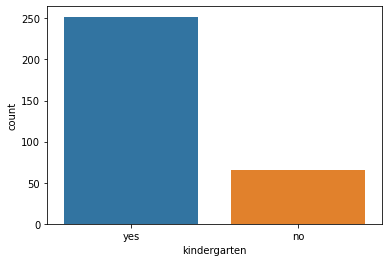

In [33]:
column_info(df.kindergarten)
sns.countplot(x='kindergarten', data=df)

# studytime_granular (загадочный столбец)

,studytime_granular
0,-6.0
1,-6.0
2,-6.0
3,-9.0
4,-6.0
...,...
388,-6.0
391,-3.0
392,-3.0
393,-3.0


Пустых значений с столбце:7 (2.1%)
Уникальных значений с столбце: 4 

-6.0     161
-3.0      82
-9.0      57
-12.0     24
Name: studytime_granular, dtype: int64 



<AxesSubplot:xlabel='studytime_granular', ylabel='count'>

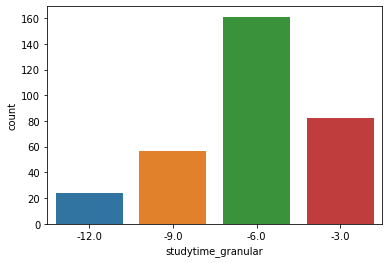

In [34]:
column_info(df.studytime_granular)
sns.countplot(x='studytime_granular', data=df, order=df.studytime_granular.value_counts().sort_index().index)

# wants_high_edu

,wants_high_edu
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
388,yes
391,yes
392,NaN
393,yes


Пустых значений с столбце:17 (5.1%)
Уникальных значений с столбце: 2 

yes    303
no      11
Name: wants_high_edu, dtype: int64 



<AxesSubplot:xlabel='wants_high_edu', ylabel='count'>

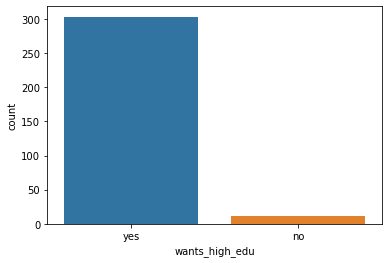

In [35]:
column_info(df.wants_high_edu)
sns.countplot(x='wants_high_edu', data=df)

# internet

,internet
0,NaN
1,yes
2,yes
3,yes
4,no
...,...
388,yes
391,yes
392,no
393,yes


Пустых значений с столбце:27 (8.2%)
Уникальных значений с столбце: 2 

yes    256
no      48
Name: internet, dtype: int64 



<AxesSubplot:xlabel='internet', ylabel='count'>

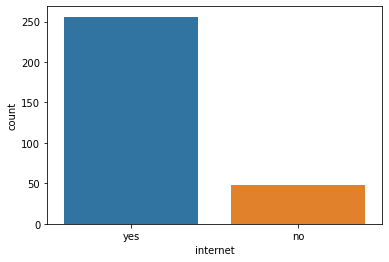

In [36]:
column_info(df.internet)
sns.countplot(x='internet', data=df)

# romantic

,romantic
0,no
1,no
2,NaN
3,yes
4,no
...,...
388,no
391,no
392,no
393,no


Пустых значений с столбце:28 (8.5%)
Уникальных значений с столбце: 2 

no     211
yes     92
Name: romantic, dtype: int64 



<AxesSubplot:xlabel='romantic', ylabel='count'>

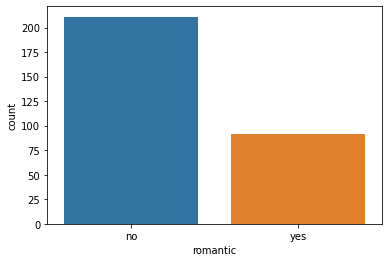

In [37]:
column_info(df.romantic)
sns.countplot(x='romantic', data=df)

# fam_rel_points

,fam_rel_points
0,4.0
1,5.0
2,4.0
3,3.0
4,4.0
...,...
388,4.0
391,2.0
392,5.0
393,4.0


Пустых значений с столбце:22 (6.6%)
Уникальных значений с столбце: 5 

4.0    155
5.0     86
3.0     49
2.0     13
1.0      6
Name: fam_rel_points, dtype: int64 



<AxesSubplot:xlabel='fam_rel_points', ylabel='count'>

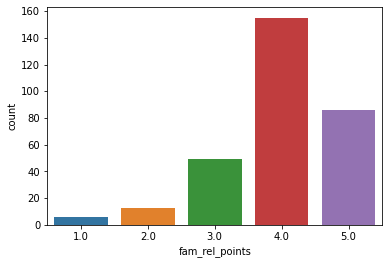

In [38]:
df.fam_rel_points = df.fam_rel_points.apply(lambda x: None if (x!=None) and (x<0) else x) #устанил выброс
column_info(df.fam_rel_points)
sns.countplot(x='fam_rel_points', data=df, order=df.fam_rel_points.value_counts().sort_index().index)

# free_time_points

,free_time_points
0,3.0
1,3.0
2,3.0
3,2.0
4,3.0
...,...
388,3.0
391,4.0
392,5.0
393,4.0


Пустых значений с столбце:7 (2.1%)
Уникальных значений с столбце: 5 

3.0    127
4.0     97
2.0     54
5.0     34
1.0     12
Name: free_time_points, dtype: int64 



<AxesSubplot:xlabel='free_time_points', ylabel='count'>

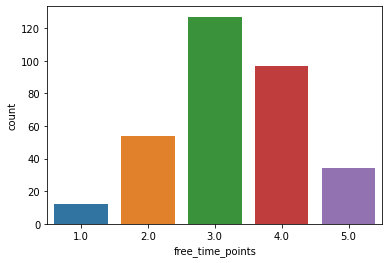

In [39]:
column_info(df.free_time_points)
sns.countplot(x='free_time_points', data=df, order=df.free_time_points.value_counts().sort_index().index)

# go_out_points

,go_out_points
0,4.0
1,3.0
2,2.0
3,2.0
4,2.0
...,...
388,4.0
391,5.0
392,3.0
393,1.0


Пустых значений с столбце:6 (1.8%)
Уникальных значений с столбце: 5 

3.0    114
2.0     85
4.0     68
5.0     42
1.0     16
Name: go_out_points, dtype: int64 



<AxesSubplot:xlabel='go_out_points', ylabel='count'>

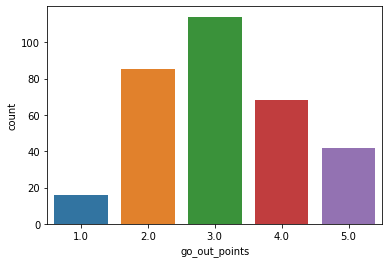

In [40]:
column_info(df.go_out_points)
sns.countplot(x='go_out_points', data=df, order=df.go_out_points.value_counts().sort_index().index)

# health_points

,health_points
0,3.0
1,3.0
2,3.0
3,5.0
4,5.0
...,...
388,1.0
391,2.0
392,3.0
393,5.0


Пустых значений с столбце:13 (3.9%)
Уникальных значений с столбце: 5 

5.0    115
3.0     74
4.0     54
1.0     42
2.0     33
Name: health_points, dtype: int64 



<AxesSubplot:xlabel='health_points', ylabel='count'>

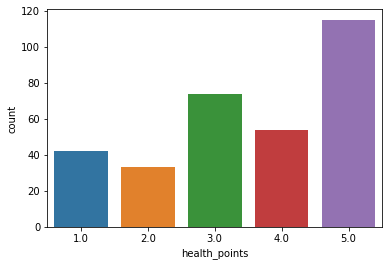

In [41]:
column_info(df.health_points)
sns.countplot(x='health_points', data=df, order=df.health_points.value_counts().sort_index().index)

# Анализ числовых столбцов

In [42]:
df.corr()

,age,mother_education,father_education,school_travel_time,extra_study_time,failures,studytime_granular,fam_rel_points,free_time_points,go_out_points,health_points,lessons_skipped,exam_score
age,1.000000,-0.150767,-0.151493,0.102910,-0.002655,0.236932,0.002655,0.077185,0.042238,0.168035,-0.035195,0.186985,-0.137150
mother_education,-0.150767,1.000000,0.609017,-0.177491,0.089759,-0.226516,-0.089759,-0.027728,0.035606,0.047964,-0.030847,0.087439,0.194359
father_education,-0.151493,0.609017,1.000000,-0.173351,-0.013805,-0.300430,0.013805,-0.036516,-0.002821,0.008723,0.018269,-0.015707,0.139193
school_travel_time,0.102910,-0.177491,-0.173351,1.000000,-0.095278,0.120386,0.095278,-0.013499,0.006231,0.036323,-0.005951,-0.054743,-0.075676
extra_study_time,-0.002655,0.089759,-0.013805,-0.095278,1.000000,-0.162346,-1.000000,0.042457,-0.130913,-0.014612,-0.090120,-0.058445,0.145047
failures,0.236932,-0.226516,-0.300430,0.120386,-0.162346,1.000000,0.162346,0.046371,0.126896,0.115329,0.075762,0.181110,-0.291047
studytime_granular,0.002655,-0.089759,0.013805,0.095278,-1.000000,0.162346,1.000000,-0.042457,0.130913,0.014612,0.090120,0.058445,-0.145047
fam_rel_points,0.077185,-0.027728,-0.036516,-0.013499,0.042457,0.046371,-0.042457,1.000000,0.155924,0.032622,0.116961,-0.083946,0.050276
free_time_points,0.042238,0.035606,-0.002821,0.006231,-0.130913,0.126896,0.130913,0.155924,1.000000,0.291103,0.065390,0.082622,-0.002840
go_out_points,0.168035,0.047964,0.008723,0.036323,-0.014612,0.115329,0.014612,0.032622,0.291103,1.000000,-0.000705,0.165410,-0.168329


Замечаем, что столбец studytime_granular полностью скоррелирован с extra_study_time. В каждом из этих столбцов 7 пропусков

In [43]:
display(df[df.studytime_granular.isnull()][['studytime_granular', 'extra_study_time']])

# Один из столбцов удалим, оставим extra_study_time

df.drop(['studytime_granular'], inplace=True, axis=1)

,studytime_granular,extra_study_time
17,NaN,NaN
91,NaN,NaN
112,NaN,NaN
129,NaN,NaN
227,NaN,NaN
266,NaN,NaN
314,NaN,NaN


In [44]:
# Удалим слабоскоррелированные с exam_score столбцы (корреляция по модулю меньше 0,1): 
# school_travel_time, fam_rel_points, free_time_points, health_points
df.drop(['school_travel_time', 'fam_rel_points', 'free_time_points', 'health_points'], inplace=True, axis=1)

In [45]:
df.corr()

,age,mother_education,father_education,extra_study_time,failures,go_out_points,lessons_skipped,exam_score
age,1.000000,-0.150767,-0.151493,-0.002655,0.236932,0.168035,0.186985,-0.137150
mother_education,-0.150767,1.000000,0.609017,0.089759,-0.226516,0.047964,0.087439,0.194359
father_education,-0.151493,0.609017,1.000000,-0.013805,-0.300430,0.008723,-0.015707,0.139193
extra_study_time,-0.002655,0.089759,-0.013805,1.000000,-0.162346,-0.014612,-0.058445,0.145047
failures,0.236932,-0.226516,-0.300430,-0.162346,1.000000,0.115329,0.181110,-0.291047
go_out_points,0.168035,0.047964,0.008723,-0.014612,0.115329,1.000000,0.165410,-0.168329
lessons_skipped,0.186985,0.087439,-0.015707,-0.058445,0.181110,0.165410,1.000000,-0.229627
exam_score,-0.137150,0.194359,0.139193,0.145047,-0.291047,-0.168329,-0.229627,1.000000


# Промежуточные итоги

Удалены слабо скоррелированные с exam_score числовые столбцы. Оставили только те, у которых abs(corr) > 0.1

Выводы по матрице корреляций: более юные ученики справляются с экзаменом немного лучше(но это еще далеко не факт, так как выборки для более взрослых малы), высшее образование родителей 
положительно сказывается на сдаче теста, дополнительные занятия вне школы положительно влияют на успеваемость.
Большое количество внеучебных неудач негативно сказывается на результатах экзамена, как и много проведенного времени с друзьями.
И, самое очевидное, пропуск уроков тоже плохо влияет на успеваемость.

Удалили выбросы, провели первоначальную чистку данных. Визуализировали информацию по каждой колонке.

Пустых значений в каждом столбце в среднем < 10%, что является достаточно хорошим показателем, как мне кажется.


# Анализ номинативных столбцов

In [46]:
# Для теста Стьюдента необходимо, чтобы все значения в столбце exam_score были числовыми. 

# Пропущенных значений в столбце exam_score всего 6 штук, так что мы не сильно наврем, 
# если заменим на медианное значение пропуски. Для каждого номинативного столбца построим график плотности распределения,
# а также boxplot.
df.exam_score = df.exam_score.fillna(df.exam_score.median())

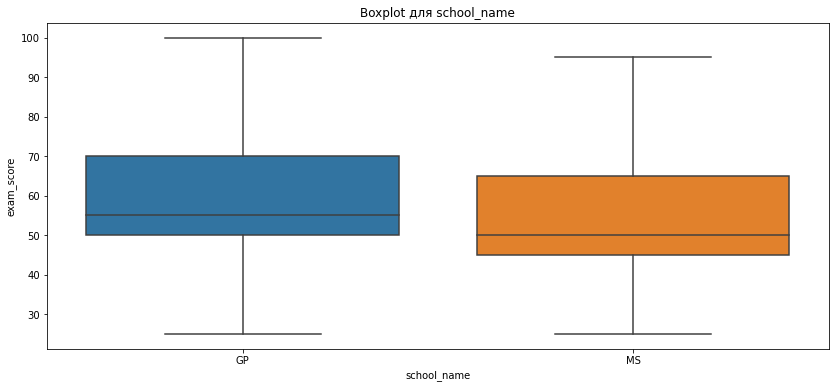

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


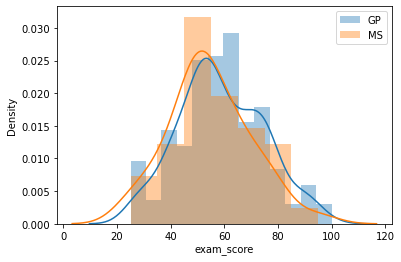

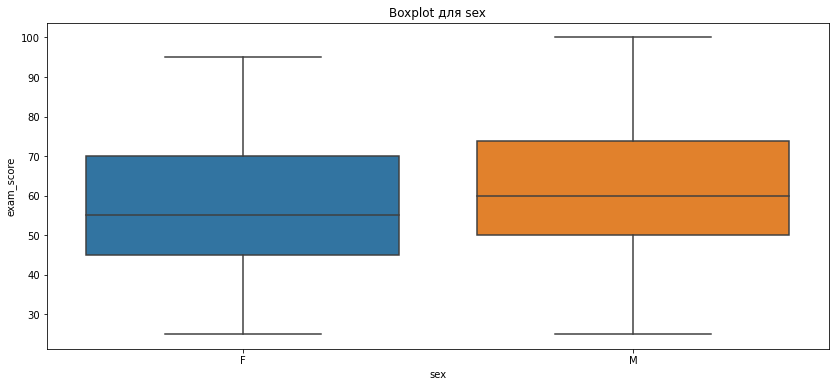

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


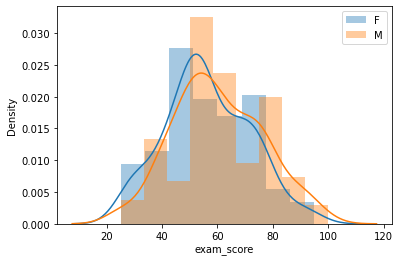

Найдены статистически значимые различия для колонки  sex


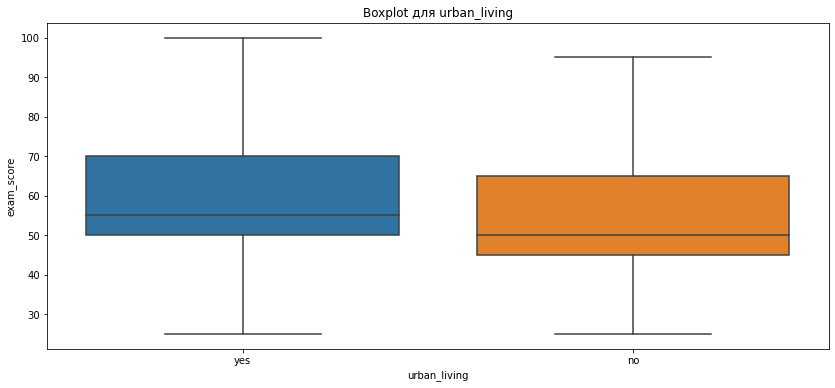

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


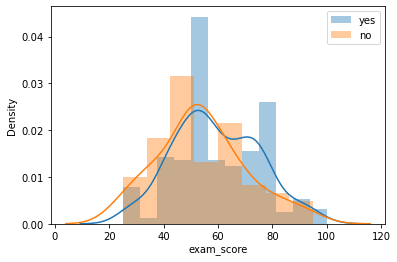

Найдены статистически значимые различия для колонки  urban_living


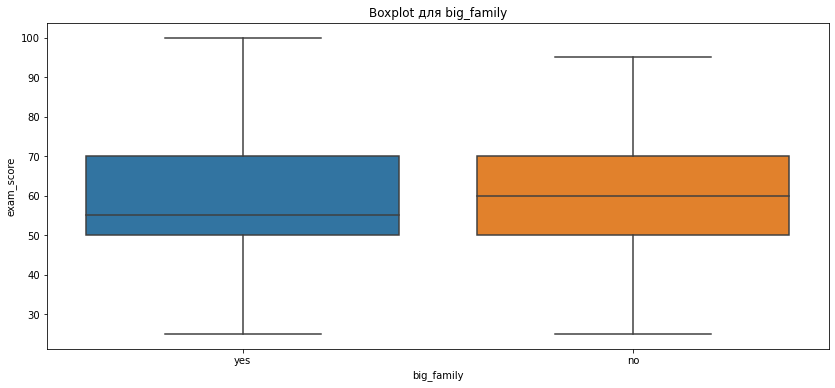

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


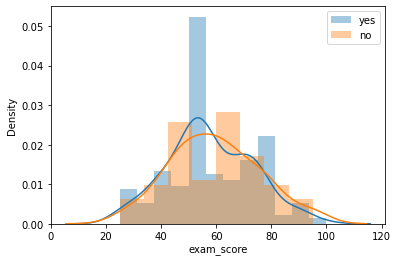

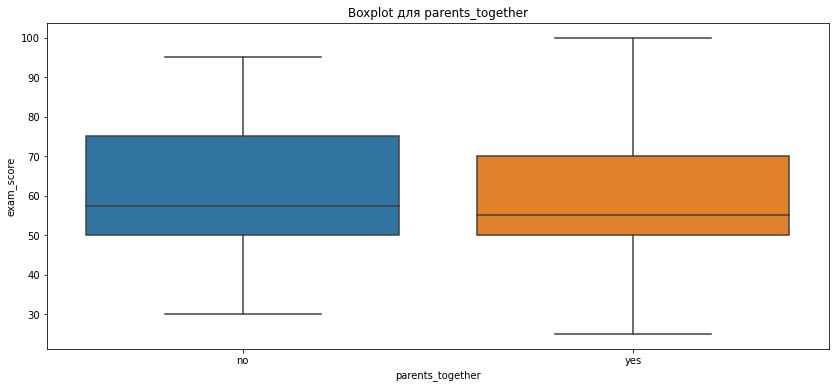

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


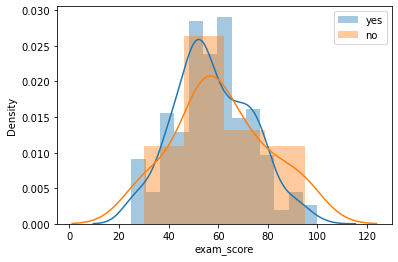

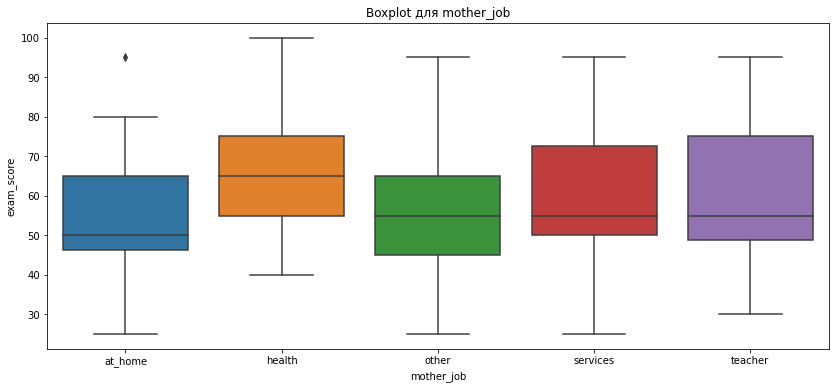

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

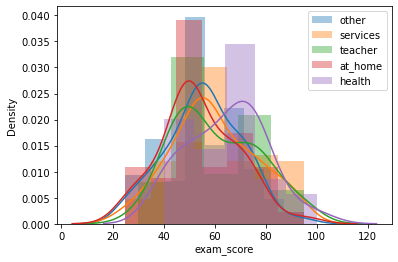

Найдены статистически значимые различия для колонки  mother_job


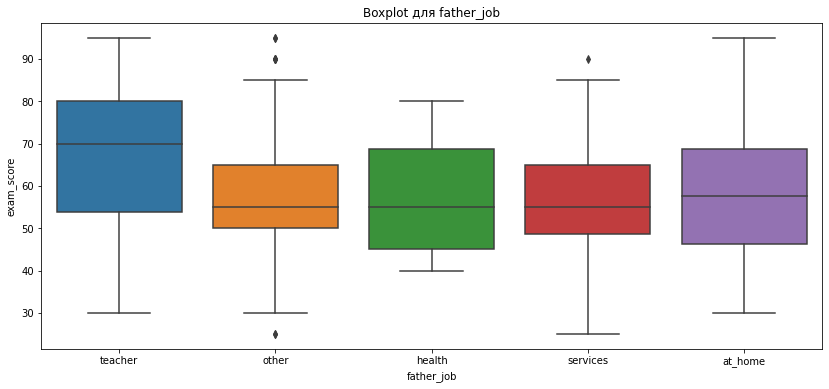

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

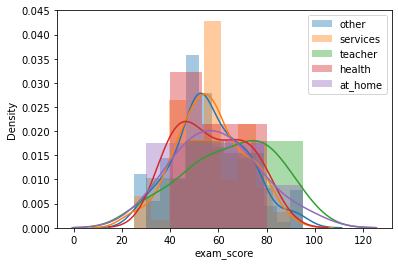

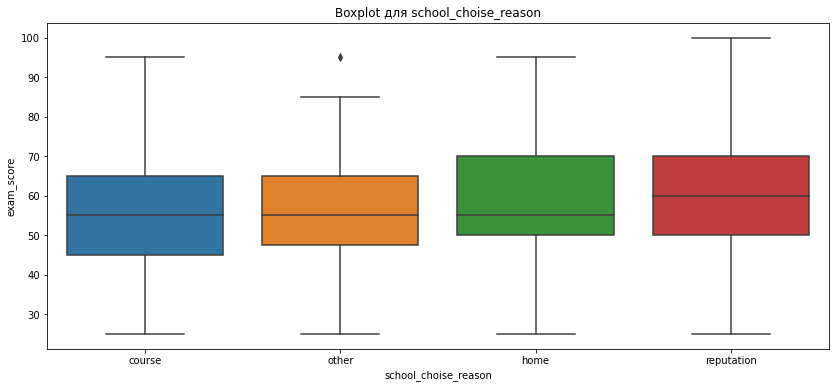

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

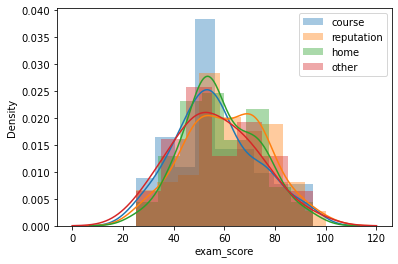

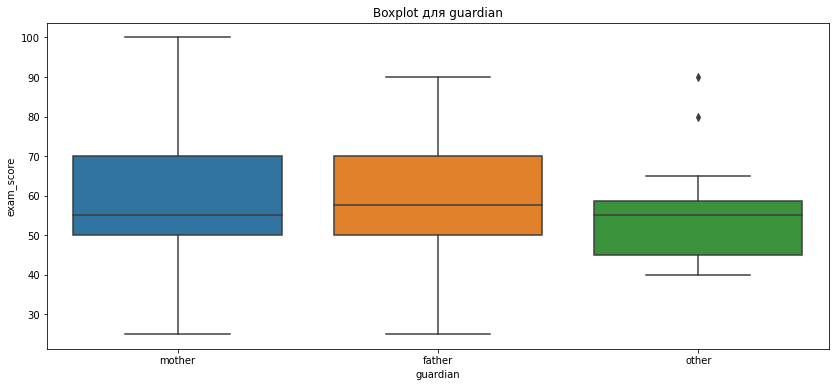

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

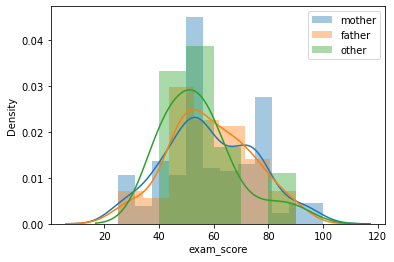

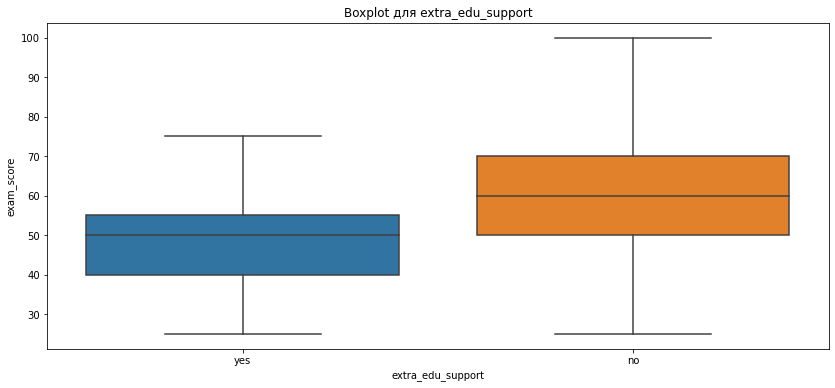

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


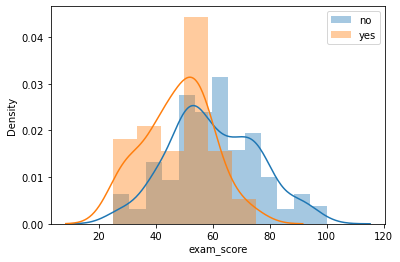

Найдены статистически значимые различия для колонки  extra_edu_support


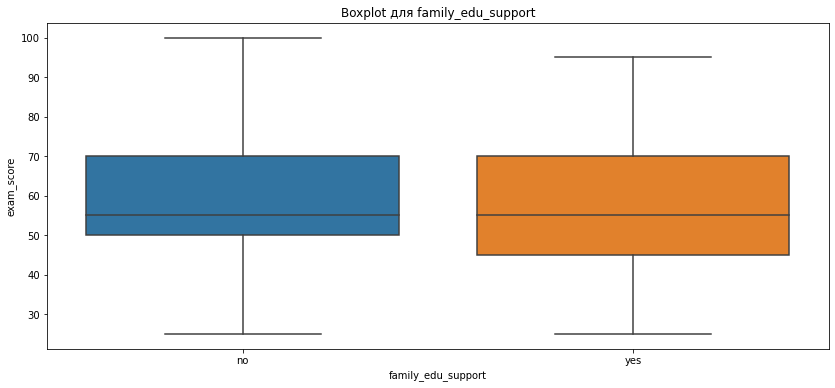

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


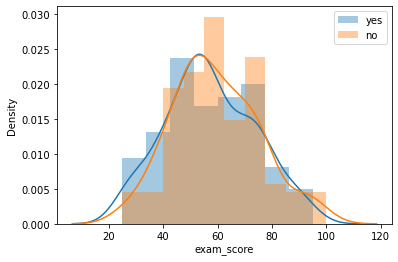

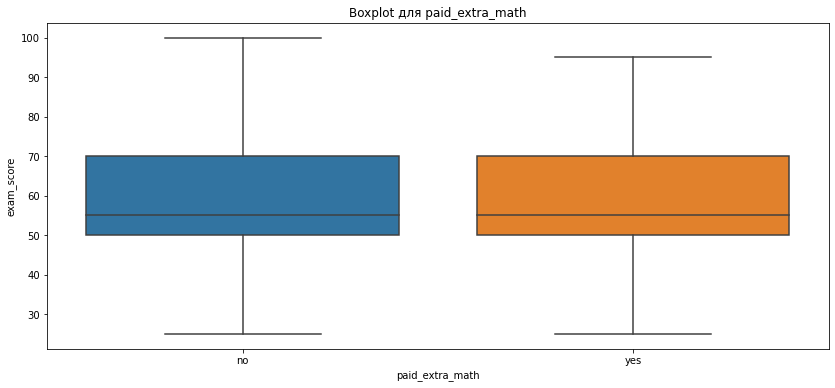

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


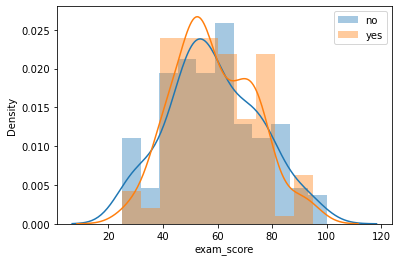

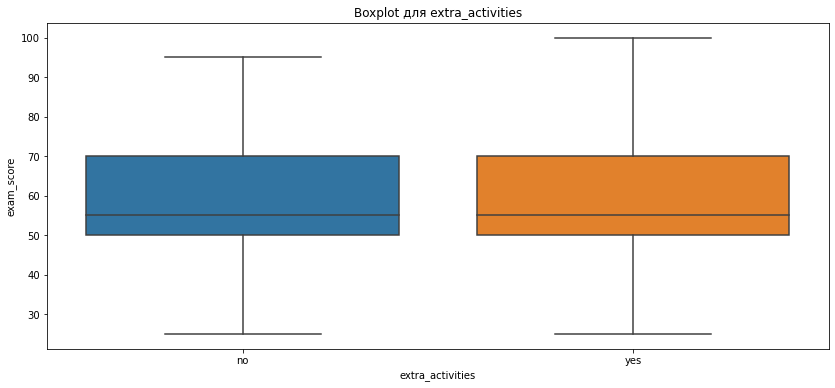

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


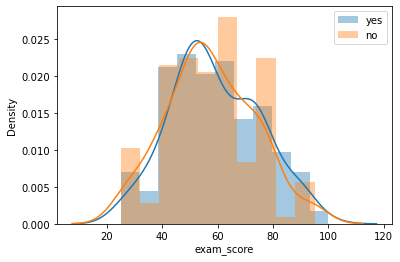

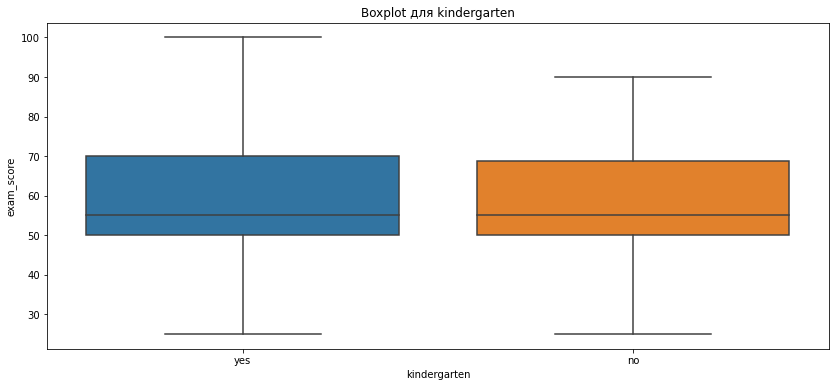

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


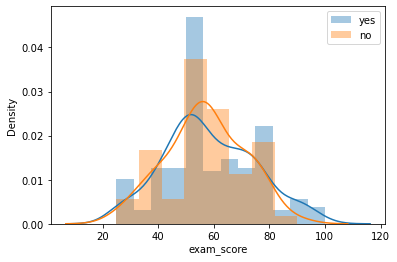

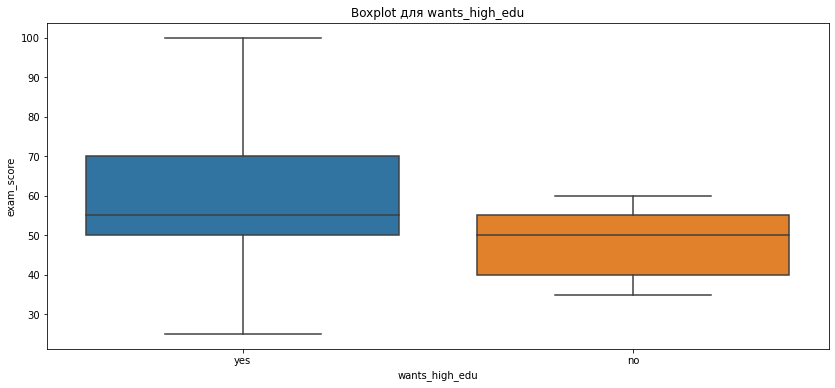

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


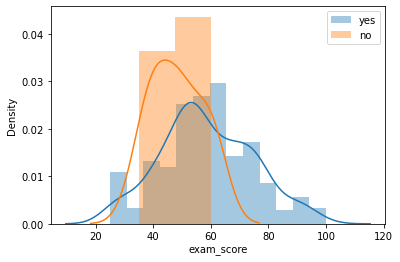

Найдены статистически значимые различия для колонки  wants_high_edu


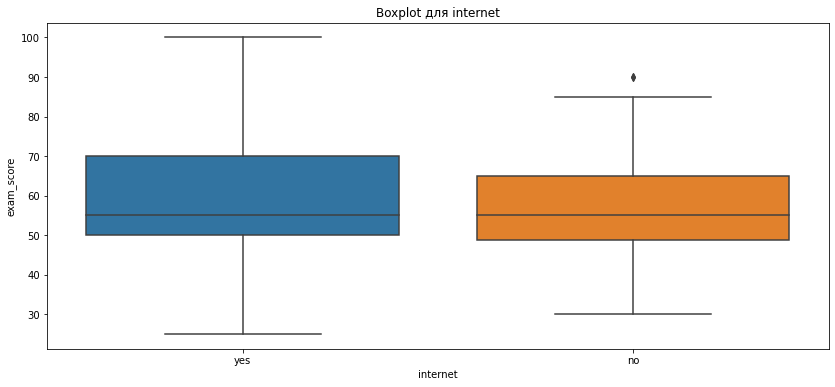

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


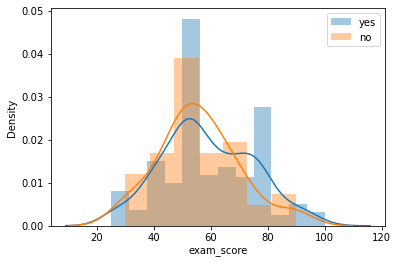

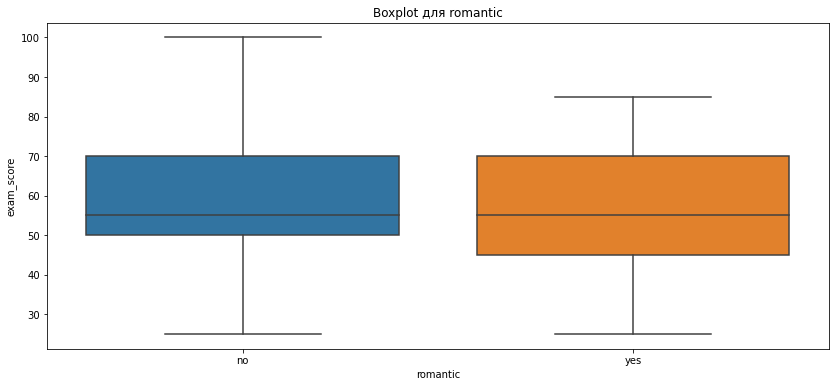

C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


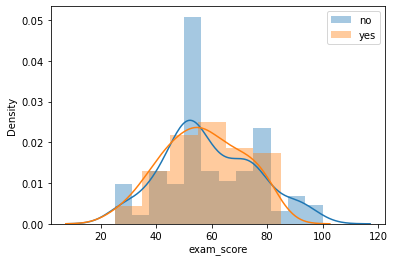

In [47]:
nomenative_cols = df.dtypes[df.dtypes=='object'].index
stat_diff_list = []
for col in nomenative_cols:
    box_dist_plot(df, col)
    get_stat_dif(df, col, stat_diff_list)


In [48]:
# В этих столбцах были найдены статистически значимые различия, а значит эти параметры влияют на exam_score
stat_diff_list

['sex', 'urban_living', 'mother_job', 'extra_edu_support', 'wants_high_edu']

In [49]:
# Но так как выборка сама по себе достаточно маленькая, то я считаю нужным добавить в stat_diff_list колонку father_job,
# потому что она должна по логике вещей влиять на exam_score
stat_diff_list.append('father_job')
stat_diff_list

['sex',
 'urban_living',
 'mother_job',
 'extra_edu_support',
 'wants_high_edu',
 'father_job']

In [50]:
# Занятный факт: у кого была дополнительная образовательная поддержка, набрали меньше баллов.
# Те, кто не хотел высшего образования, набрали мало баллов, что вполне логично. Но таких очень мало.

# В итоге из всех столбцов оставляем числовые и sex, urban_living, mother_job, father_job, 
# extra_edu_support, wants_high_edu
drop_columns = list(set(df.columns) - set(stat_diff_list) - set(df.dtypes[df.dtypes!='object'].index))
df.drop(drop_columns, inplace=True, axis=1)
df

,sex,age,urban_living,mother_education,father_education,mother_job,father_job,extra_study_time,failures,extra_edu_support,wants_high_edu,go_out_points,lessons_skipped,exam_score
0,F,18,yes,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,4.0,6.0,30.0
1,F,17,yes,1.0,1.0,at_home,other,2.0,0.0,no,yes,3.0,4.0,30.0
2,F,15,yes,1.0,1.0,at_home,other,2.0,3.0,yes,yes,2.0,10.0,50.0
3,F,15,yes,4.0,2.0,health,NaN,3.0,0.0,no,yes,2.0,2.0,75.0
4,F,16,yes,3.0,3.0,other,other,2.0,0.0,no,yes,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,F,18,yes,3.0,1.0,teacher,services,2.0,0.0,no,yes,4.0,0.0,40.0
391,M,17,yes,3.0,1.0,services,services,1.0,0.0,no,yes,5.0,3.0,80.0
392,M,21,no,1.0,1.0,other,other,1.0,3.0,NaN,NaN,3.0,3.0,35.0
393,M,18,no,3.0,2.0,services,other,1.0,0.0,no,yes,1.0,0.0,50.0


# Восстановим пропущенные значения

Так как пропущенных значений в каждом столбце не очень много (0.1 от общего числа), то замена медианным значением для числовых столбцов и модой для номинативных внесет не слишком большую погрешность. Приступим.

### Числовые столбцы

In [51]:
numerical_cols = df.dtypes[df.dtypes!='object'].index
for column in numerical_cols:
    df[column].fillna(df[column].median(), inplace=True)

### Номинативные столбцы

In [52]:
nomenative_cols = stat_diff_list
for column in nomenative_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 394
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                331 non-null    object 
 1   age                331 non-null    int64  
 2   urban_living       331 non-null    object 
 3   mother_education   331 non-null    float64
 4   father_education   331 non-null    float64
 5   mother_job         331 non-null    object 
 6   father_job         331 non-null    object 
 7   extra_study_time   331 non-null    float64
 8   failures           331 non-null    float64
 9   extra_edu_support  331 non-null    object 
 10  wants_high_edu     331 non-null    object 
 11  go_out_points      331 non-null    float64
 12  lessons_skipped    331 non-null    float64
 13  exam_score         331 non-null    float64
dtypes: float64(7), int64(1), object(6)
memory usage: 48.8+ KB


Вывод: провели чистку и первичный анализ данных, восстановили пропуски, удалдили слабо скоррелированные с exam_score столбцы.

Я считаю, что этот набор данных слишком мал, чтобы строить модель предсказания баллов за экзамен для всех детей. А вот для предсказания баллов за экзамен для учеников из школы GP подойдет.